In [40]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
# cifar10 to grayscale
# mnist, cifar 2차원 맞춰주기
#cnn binary classification
#mnist data label이 아니면 cifar로 분

# MNIST 읽고 텐서 모양 출력
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("MNIST: ",x_train.shape,y_train.shape,x_test.shape,y_test.shape)
yy_train=tf.one_hot(y_train,10,dtype=tf.int8) #원핫 코드로 변환
x_train=x_train.reshape(60000,784) #텐서 모양 변환
x_test=x_test.reshape(10000,784)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) #원핫 코드 변환
y_test=tf.keras.utils.to_categorical(y_test,10)
print("MNIST: ",x_train.shape,y_train.shape,x_test.shape,y_test.shape)

#CIFAR-10 읽고 텐서 모양 출력
(cifar_x_train,cifar_y_train), (cifar_x_test,cifar_y_test)=keras.datasets.cifar10.load_data()
print("CIFAR-10:", cifar_x_train.shape,cifar_y_train.shape,cifar_x_test.shape, cifar_y_test.shape)
cifar_x_train=cifar_x_train.astype(np.float32)/255.0
cifar_x_test=cifar_x_test.astype(np.float32)/255.0
cifar_y_train=tf.keras.utils.to_categorical(cifar_y_train,10) #원핫 코드 변환
cifar_y_test=tf.keras.utils.to_categorical(cifar_y_test,10)
print("CIFAR-10:", cifar_x_train.shape,cifar_y_train.shape,cifar_x_test.shape, cifar_y_test.shape)


MNIST:  (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
MNIST:  (60000, 784) (60000, 10) (10000, 784) (10000, 10)
CIFAR-10: (50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
CIFAR-10: (50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


---
### Cifar10 rgb to grayscale

In [41]:
import cv2
import matplotlib.pyplot as plt

def gamma_decompress(value, gamma=2.2):
    return value ** gamma

def gamma_compress(value, gamma=2.2):
    return value ** (1/gamma)

def rgb_to_grayscale_gamma_corrected(img, gamma=2.2):
    b, g, r = cv2.split(img)  
    # 감마 확장을 적용하여 감마 압축된 RGB 값을 선형 공간으로 변환
    r_linear = gamma_decompress(r/255.0, gamma)
    g_linear = gamma_decompress(g/255.0, gamma)
    b_linear = gamma_decompress(b/255.0, gamma)
    
    # 선형 RGB 값을 사용하여 선형 밝기 값을 계산
    y_linear = 0.2126 * r_linear + 0.7152 * g_linear + 0.0722 * b_linear
    
    # 필요한 경우 선형 밝기 값을 다시 감마 압축하여 그레이스케일 값으로 변환
    y_nonlinear = gamma_compress(y_linear, gamma)
    
    # 0-255 스케일로 변환
    return np.rint(y_nonlinear * 255)

In [42]:
# CIFAR-10 데이터셋을 흑백으로 변환
def convert_to_grayscale(data):
    grayscale_data = []
    for img in data:
        grayscale_img = rgb_to_grayscale_gamma_corrected(img)
        grayscale_data.append(grayscale_img)
    return np.array(grayscale_data)

# 학습 및 테스트 데이터에 대해 흑백 변환 적용
cifar_x_train_gray = convert_to_grayscale(cifar_x_train)
cifar_x_test_gray = convert_to_grayscale(cifar_x_test)

In [43]:
# 변환된 데이터 확인
print("CIFAR-10 (Grayscale):", cifar_x_train_gray.shape, cifar_x_test_gray.shape)

CIFAR-10 (Grayscale): (50000, 32, 32) (10000, 32, 32)


## Mnist, Cifar10 차원 맞추기

In [44]:
def get_numpy_from_nonfixed_2d_array(aa, fixed_length, padding_value=0):
    rows = []
    for a in aa:
        rows.append(np.pad(a, (0, fixed_length), 'constant', constant_values=padding_value)[:fixed_length])
    return np.concatenate(rows, axis=0).reshape(-1, fixed_length)

In [45]:
print("padding 전 x_train:",x_train.shape)
x_train=get_numpy_from_nonfixed_2d_array(x_train, fixed_length=3072, padding_value=0)
print("X_train shape:",x_train.shape)

print("padding 전 x_test:",x_test.shape)
x_test=get_numpy_from_nonfixed_2d_array(x_train, fixed_length=3072, padding_value=0)
print("x_test shape:",x_test.shape)

padding 전 x_train: (60000, 784)
X_train shape: (60000, 3072)
padding 전 x_test: (10000, 784)
x_test shape: (60000, 3072)


In [46]:
# CNN에 맞추기 위해 4D로 변환
x_train = x_train.reshape(-1, 32, 32)
x_test = x_test.reshape(-1, 32, 32)

# CIFAR-10 레이블을 원핫 인코딩으로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print("MNist:", x_train.shape, x_test.shape,y_train.shape)

MNist: (180000, 32, 32) (180000, 32, 32) (60000, 10, 10)


In [48]:
# CIFAR-10 레이블을 원핫 인코딩으로 변환
cifar_y_train = tf.keras.utils.to_categorical(cifar_y_train, 10)
cifar_y_test = tf.keras.utils.to_categorical(cifar_y_test, 10)

print("CIFAR-10", cifar_x_train.shape, cifar_y_train.shape)


CIFAR-10 (50000, 32, 32, 3) (50000, 10, 10)


In [49]:
#모양 체크 
print("MNist:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("CIFAR-10: ",cifar_x_train_gray.shape, cifar_y_train.shape, cifar_x_test_gray.shape, cifar_y_test.shape)

MNist: (180000, 32, 32) (60000, 10, 10) (180000, 32, 32) (10000, 10, 10)
CIFAR-10:  (50000, 32, 32) (50000, 10, 10) (10000, 32, 32) (10000, 10, 10)


In [50]:
x_train_data=np.concatenate([x_train, cifar_x_train_gray])
x_test_data=np.concatenate([x_test, cifar_x_test_gray])
y_train_data=np.concatenate([y_train, cifar_y_train])
y_test_data=np.concatenate([y_test, cifar_y_test])

#print(f"x_train_data : {x_train_data.shape} x_test_data:{x_test_data.shape} ")
print(f"x_train_data : {x_train_data.shape} x_test_data:{x_test_data.shape} y_train_data: {y_train_data.shape} y_test_data: {y_test_data.shape} ")

x_train_data : (230000, 32, 32) x_test_data:(190000, 32, 32) y_train_data: (110000, 10, 10) y_test_data: (20000, 10, 10) 


In [57]:
# Model Creation
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_data, y_train_data, epochs=10, batch_size=64,
                    validation_data=(x_test_data, y_test_data))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_data, y_test_data)
print(f'Test accuracy: {test_acc}')


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


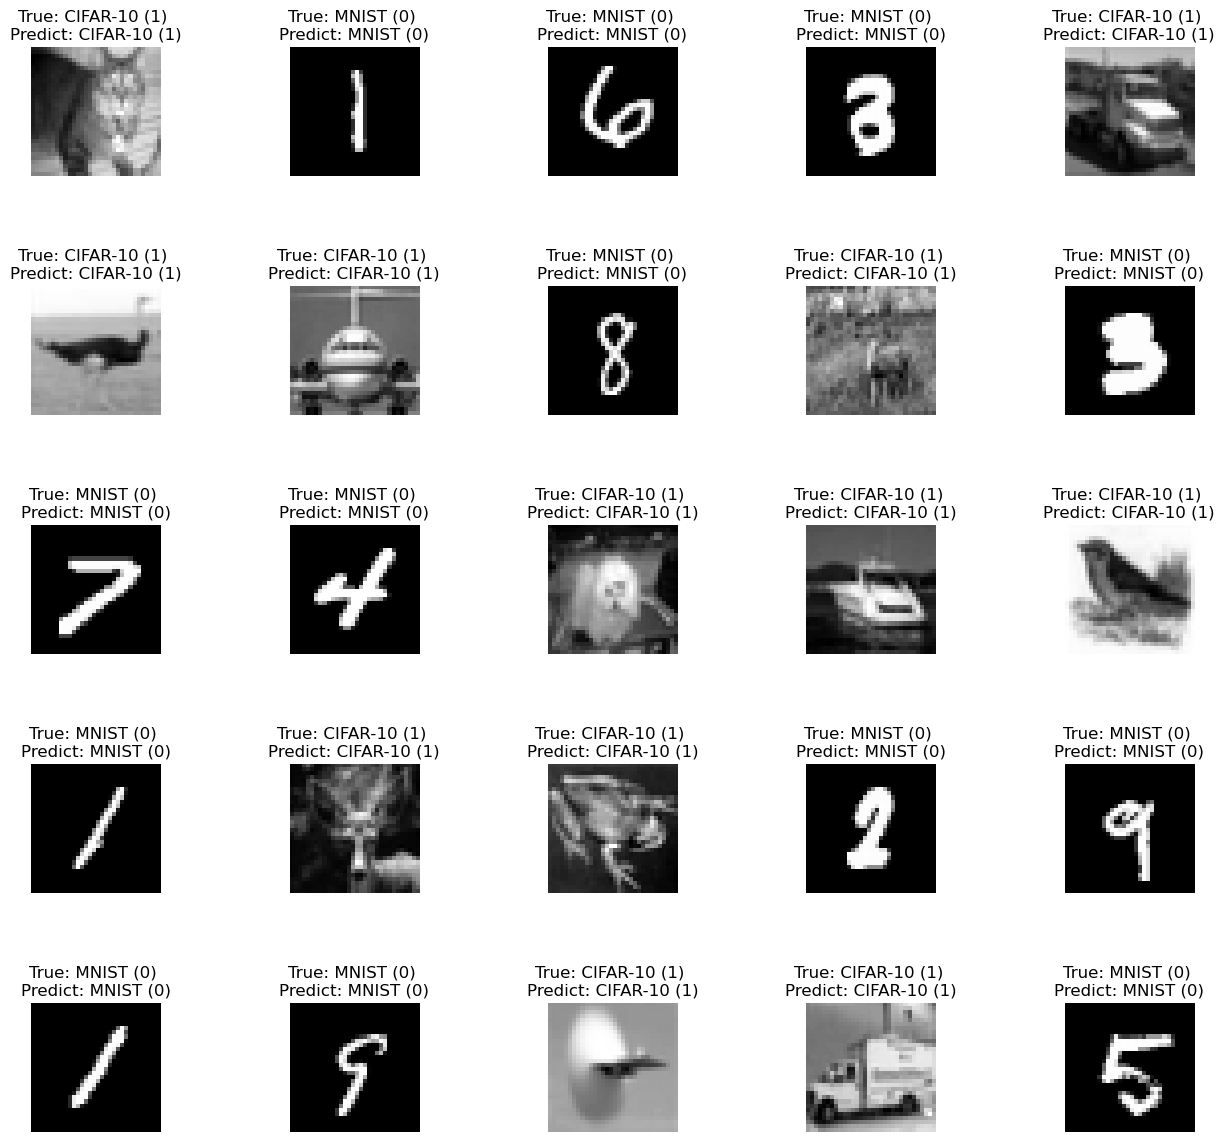

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test_combined)

# Convert probabilities to class labels (0 or 1)
# For binary classification, you can use a threshold of 0.5
pred_classes = (predictions > 0.5).astype(int).flatten()  # Flatten to 1D array

# Since we labeled MNIST as 0 and CIFAR-10 as 1
true_classes = y_test_combined  # Already in binary form (0 for MNIST, 1 for CIFAR-10)

# Plotting the Actual vs. Predicted results
class_names = ['MNIST (0)', 'CIFAR-10 (1)']  # Adjust class names for binary classification

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 25):  # Display 25 images (5x5 grid)
    axes[i].imshow(x_test_combined[i].reshape(32, 32), cmap='gray')  # Ensure the image is displayed correctly for grayscale
    # Use int to ensure proper indexing
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[int(true_classes[i])], class_names[int(pred_classes[i])]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()


---
## CNN Model 구성

In [20]:
import tensorflow as tf

x_train_data=tf.stack(x_train_data)
y_train_data=tf.stack(y_train_data)
#data_list = tf.stack(data_list)
#y = tf.stack(y)

In [12]:
y_train_data = tf.reshape(y_train_data, (-1, 10))
y_test_data = tf.reshape(y_test_data, (-1, 10))


x_train_data = x_train_data[:110000]
y_train_data = y_train_data[:110000]  
y_test_data=y_test_data[:190000]

print(f"x_train_data : {x_train_data.shape} x_test_data:{x_test_data.shape} y_train_data: {y_train_data.shape} y_test_data: {y_test_data.shape} ")

x_train_data : (110000, 32, 32, 1) x_test_data:(190000, 32, 32, 1) y_train_data: (110000, 10) y_test_data: (200000, 10) 


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras import datasets, layers, models
import numpy as np

# Creating a sequential model and adding layers to it

num_classes=10
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,298 (2.11 MB)

 Trainable params: 551,146 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [37]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(np.array(x_train_data), np.array(y_train_data),batch_size=64, epochs=100,
                    validation_data=(np.array(x_test_data), np.array(y_test_data)))

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 1)

In [26]:
model.save("CNN_1009.keras")

In [ ]:
# 필요 라이브러리 import
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, dataset



In [28]:
input_data = np.expand_dims(x_test_data[0], axis=0)  # Add batch dimension
input_data = np.repeat(input_data, 1, axis=-1)  # Repeat the grayscale channel to create an RGB-like input
    
# 예측 수행
# Making the Predictions
pred = model.predict(input_data)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step
[[9.1564792e-01 8.4352031e-02 3.8654646e-10 3.9707104e-10 4.3465728e-10
  4.2562387e-10 4.5511830e-10 4.5693355e-10 4.5835466e-10 4.4206244e-10]]
[0]


5938/5938 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


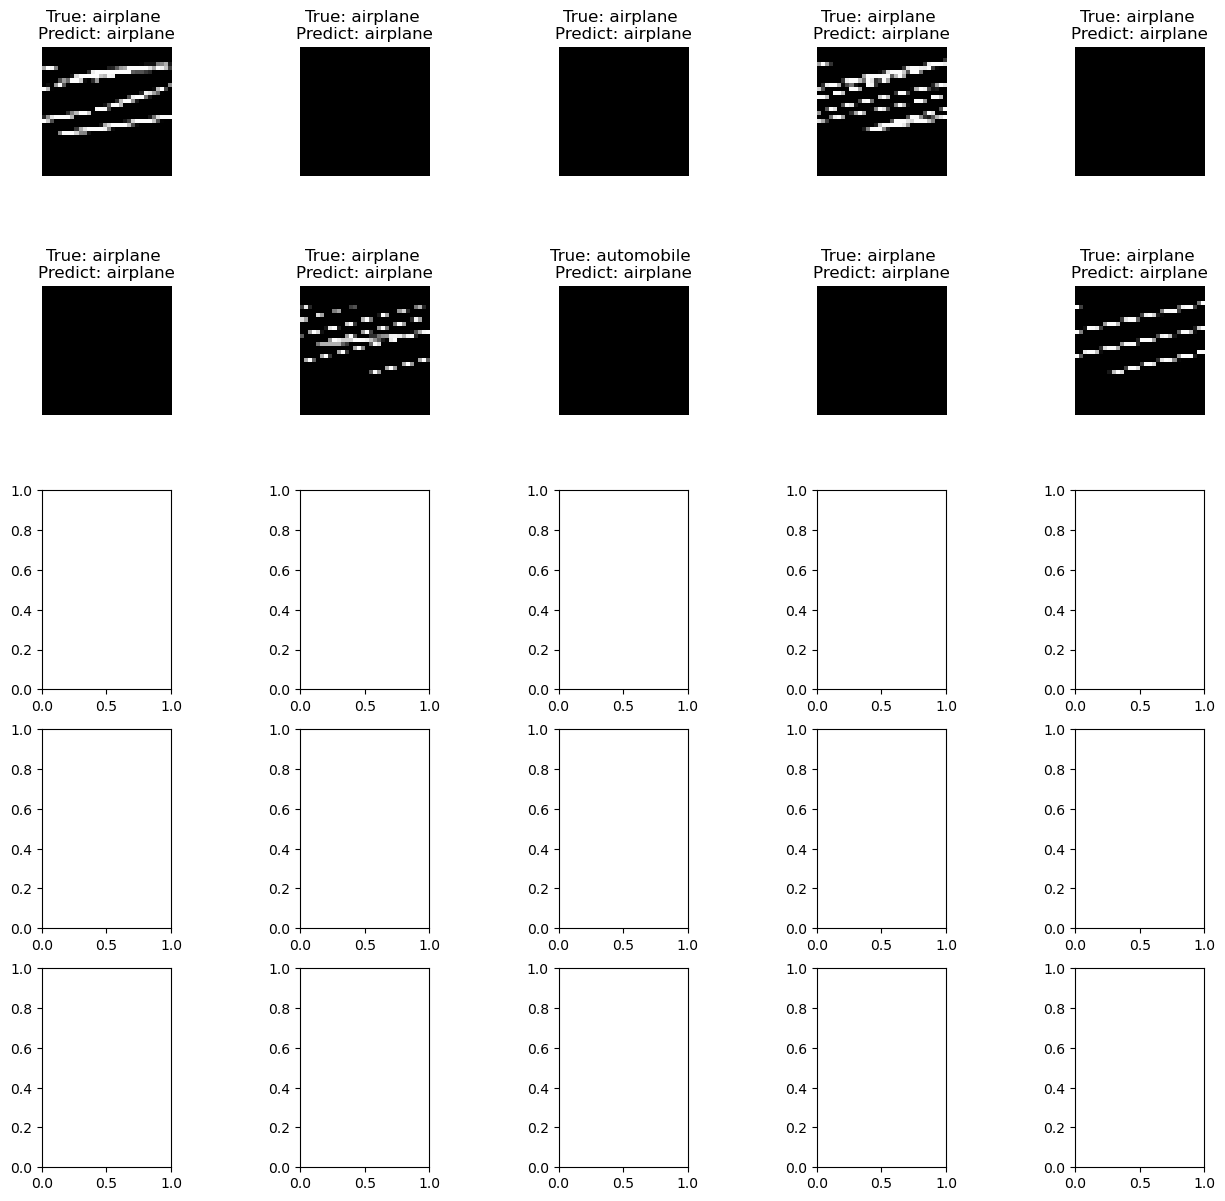

In [32]:
# Assuming you have already predicted classes
predictions = model.predict(x_test_data)
pred_classes = np.argmax(predictions, axis=1)  # Get the predicted class indices

# Converting one-hot encoded labels to class indices for the true labels
true_classes = np.argmax(y_test_data, axis=1)

# Plotting the Actual vs Predicted results
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 10):  # Adjust the range if you want to plot more images
    axes[i].imshow(x_test_data[i].reshape(32, 32), cmap='gray')  # Ensure the image is displayed correctly for grayscale
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[true_classes[i]], class_names[pred_classes[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()


In [34]:
import numpy as np
import tensorflow as tf
from keras import layers, models
from sklearn.utils import shuffle

# MNIST Data
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

# CIFAR-10 Data
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = keras.datasets.cifar10.load_data()

# Reshape MNIST and normalize both datasets
x_train_mnist = x_train_mnist.astype(np.float32) / 255.0
x_test_mnist = x_test_mnist.astype(np.float32) / 255.0

# Reshape MNIST to (32, 32, 1) by padding to match CIFAR-10 size
x_train_mnist = np.pad(x_train_mnist, ((0, 0), (2, 2), (2, 2)), 'constant')
x_test_mnist = np.pad(x_test_mnist, ((0, 0), (2, 2), (2, 2)), 'constant')

# Add channel dimension to match CIFAR-10 format
x_train_mnist = x_train_mnist.reshape(-1, 32, 32, 1)
x_test_mnist = x_test_mnist.reshape(-1, 32, 32, 1)

# Convert CIFAR-10 to grayscale
def convert_to_grayscale(data):
    grayscale_data = []
    for img in data:
        grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        grayscale_data.append(grayscale_img)
    return np.array(grayscale_data)

cifar_x_train_gray = convert_to_grayscale(cifar_x_train)
cifar_x_test_gray = convert_to_grayscale(cifar_x_test)

# Normalize CIFAR-10 grayscale images
cifar_x_train_gray = cifar_x_train_gray.astype(np.float32) / 255.0
cifar_x_test_gray = cifar_x_test_gray.astype(np.float32) / 255.0

# Add channel dimension to CIFAR-10 grayscale
cifar_x_train_gray = cifar_x_train_gray.reshape(-1, 32, 32, 1)
cifar_x_test_gray = cifar_x_test_gray.reshape(-1, 32, 32, 1)

# Label MNIST as class 0 and CIFAR-10 as class 1
y_train_mnist_bin = np.zeros(len(y_train_mnist))
y_test_mnist_bin = np.zeros(len(y_test_mnist))

y_train_cifar_bin = np.ones(len(cifar_y_train))
y_test_cifar_bin = np.ones(len(cifar_y_test))

# Combine the MNIST and CIFAR-10 datasets
x_train_combined = np.concatenate((x_train_mnist, cifar_x_train_gray), axis=0)
y_train_combined = np.concatenate((y_train_mnist_bin, y_train_cifar_bin), axis=0)

x_test_combined = np.concatenate((x_test_mnist, cifar_x_test_gray), axis=0)
y_test_combined = np.concatenate((y_test_mnist_bin, y_test_cifar_bin), axis=0)

# Shuffle the combined datasets
x_train_combined, y_train_combined = shuffle(x_train_combined, y_train_combined, random_state=42)
x_test_combined, y_test_combined = shuffle(x_test_combined, y_test_combined, random_state=42)

# Model Creation
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train_combined, y_train_combined, epochs=10, batch_size=64,
                    validation_data=(x_test_combined, y_test_combined))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_combined, y_test_combined)
print(f'Test accuracy: {test_acc}')


/raid/coss35/anaconda3/envs/project/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9874 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 1.6452e-06
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 1.0000 - loss: 1.6191e-04 - val_accuracy: 1.0000 - val_loss: 5.7916e-08
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 1.0266e-06 - val_accuracy: 1.0000 - val_loss: 1.2193e-08
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 3.9461e-06 - val_accuracy: 1.0000 - val_loss: 1.7457e-09
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 9.1859e-05 - val_accuracy: 1.0000 - val_loss: 3.5207e-08
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 1.0000 - loss: 3.4185e-05 - val_accuracy: 1.0000 - val_loss: 3.5355e-10
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.0000 - loss: 2.8215e-07 - val_accuracy: 1.0000 - val_loss: 1.7137e-10
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━

In [60]:
x_train_combined, y_train_combined = shuffle(x_train_combined, y_train_combined, random_state=42)
x_test_combined, y_test_combined = shuffle(x_test_combined, y_test_combined, random_state=42)

print(f"x_train_combined : {x_train_combined.shape} , y_train_combined {y_train_combined.shape}, x_test_combined:{x_test_combined.shape}, y_test_combined : {y_test_combined.shape}")


x_train_combined : (110000, 32, 32, 1) , y_train_combined (110000,), x_test_combined:(20000, 32, 32, 1), y_test_combined : (20000,)


In [35]:
model.save("GPT_1009.keras")

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


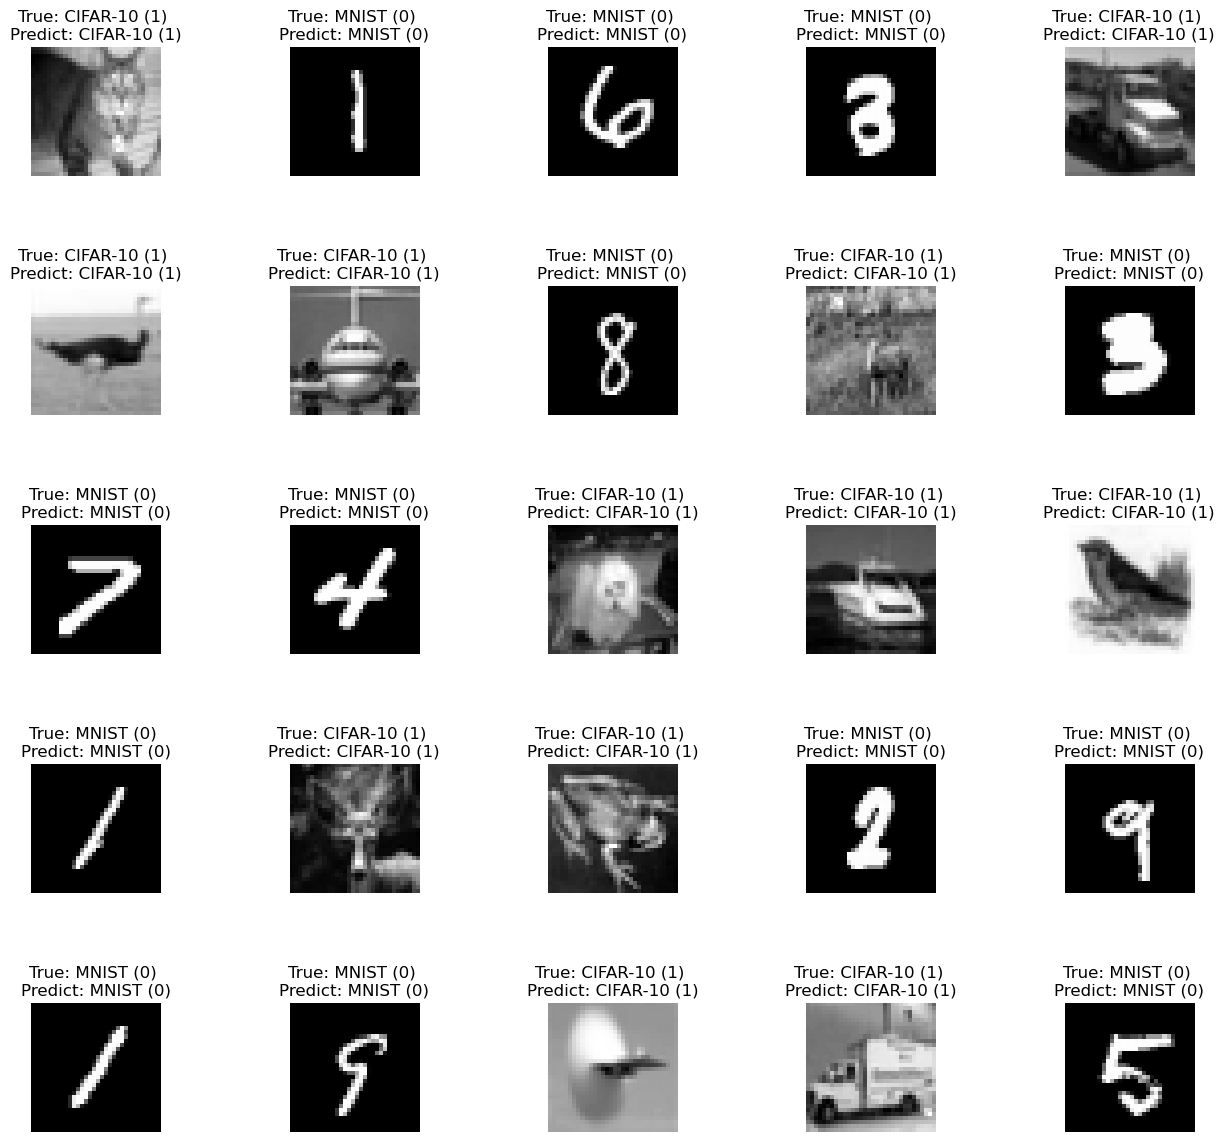

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test_combined)

# Convert probabilities to class labels (0 or 1)
# For binary classification, you can use a threshold of 0.5
pred_classes = (predictions > 0.5).astype(int).flatten()  # Flatten to 1D array

# Since we labeled MNIST as 0 and CIFAR-10 as 1
true_classes = y_test_combined  # Already in binary form (0 for MNIST, 1 for CIFAR-10)

# Plotting the Actual vs. Predicted results
class_names = ['MNIST (0)', 'CIFAR-10 (1)']  # Adjust class names for binary classification

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, 25):  # Display 25 images (5x5 grid)
    axes[i].imshow(x_test_combined[i].reshape(32, 32), cmap='gray')  # Ensure the image is displayed correctly for grayscale
    # Use int to ensure proper indexing
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[int(true_classes[i])], class_names[int(pred_classes[i])]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
import numpy as np


# 2. Model 구성
model = Sequential()
model.add(Conv2D(padding="same",filters=32, kernel_size=(4, 4), input_shape=(32, 32, 1)))
model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Multi-class classification

# 3. Compile the model
model.compile(loss='categorical_crossentropy',  
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 4. Train the model
history=model.fit(np.array(x_train_data), np.array(y_train_data), verbose=2, epochs=100, batch_size=128)


/raid/coss35/anaconda3/envs/project/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


I0000 00:00:1728328140.400973  662681 service.cc:146] XLA service 0x7feb400190c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728328140.401011  662681 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1728328140.401017  662681 service.cc:154]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2024-10-08 04:09:00.427426: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-08 04:09:00.536856: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90300
2024-10-08 04:09:10.565562: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_512', 20 bytes spill stores, 20 bytes spill loads

I0000 00:00:1728328158.673372  662681 device_c

860/860 - 36s - 42ms/step - accuracy: 0.8995 - loss: 0.3389
Epoch 2/100
860/860 - 9s - 11ms/step - accuracy: 0.9000 - loss: 0.3283
Epoch 3/100
860/860 - 5s - 6ms/step - accuracy: 0.9000 - loss: 0.3277
Epoch 4/100
860/860 - 3s - 4ms/step - accuracy: 0.9000 - loss: 0.3262
Epoch 5/100
860/860 - 5s - 6ms/step - accuracy: 0.9000 - loss: 0.3253
Epoch 6/100
860/860 - 5s - 6ms/step - accuracy: 0.9000 - loss: 0.3247
Epoch 7/100
860/860 - 5s - 6ms/step - accuracy: 0.9000 - loss: 0.3223
Epoch 8/100
860/860 - 3s - 4ms/step - accuracy: 0.9003 - loss: 0.3178
Epoch 9/100
860/860 - 5s - 6ms/step - accuracy: 0.9018 - loss: 0.3103
Epoch 10/100
860/860 - 5s - 6ms/step - accuracy: 0.9048 - loss: 0.2984
Epoch 11/100
860/860 - 5s - 6ms/step - accuracy: 0.9098 - loss: 0.2838
Epoch 12/100
860/860 - 3s - 4ms/step - accuracy: 0.9142 - loss: 0.2697
Epoch 13/100
860/860 - 3s - 4ms/step - accuracy: 0.9188 - loss: 0.2575
Epoch 14/100
860/860 - 3s - 4ms/step - accuracy: 0.9223 - loss: 0.2488
Epoch 15/100
860/860 - 5

In [16]:
res=model.evaluate(x_test_data,y_test_data, verbose = 2)
print("정확률은", res[1]*100)

5938/5938 - 15s - 2ms/step - accuracy: 0.8761 - loss: 2.1703
정확률은 87.60789632797241


---
## Predict

In [13]:
from keras.models import load_model

model = load_model("CNN_1008.keras") 
model.summary()

/raid/coss35/anaconda3/envs/project/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,661,398 (128.41 MB)

 Trainable params: 16,830,698 (64.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,830,700 (64.20 MB)

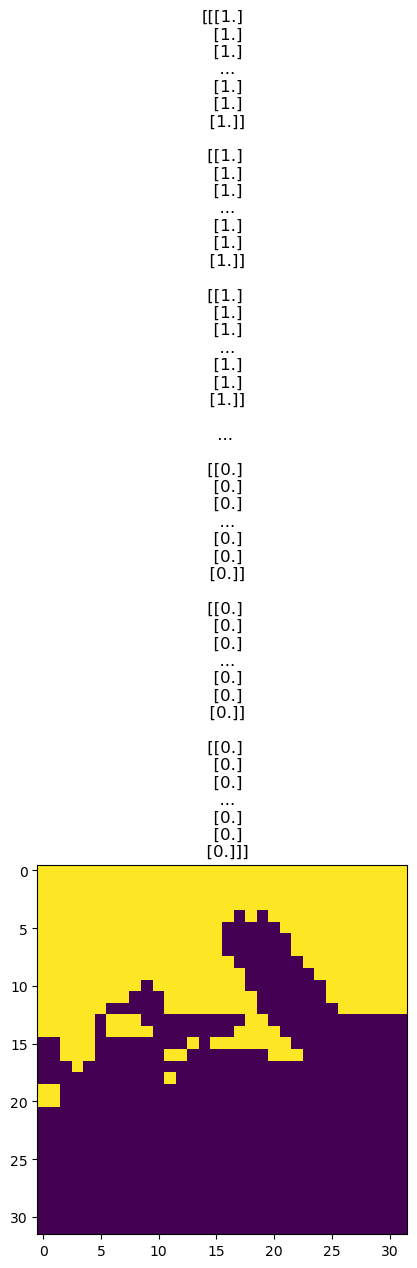

In [27]:
plt.title(cifar_x_train_gray[2])
plt.imshow(cifar_x_train_gray[2])
plt.show()

In [28]:
# CIFAR-10 클래스 이름
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
clases=[]

for i in range(10):
    temp=str(i)
    classes_name.append(temp)
    clases.append(temp)

print(classes_name)

input_data = np.expand_dims(cifar_x_train_gray[2], axis=0)  # Add batch dimension
input_data = np.repeat(input_data, 1, axis=-1)  # Repeat the grayscale channel to create an RGB-like input
    
# 예측 수행
preds = model.predict(input_data)
    
# 예측된 클래스의 인덱스를 구합니다.
predicted_class = np.argmax(preds)

print(f"Predicted class: {classes_name[predicted_class]}")

['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


I0000 00:00:1728416485.280854  909216 service.cc:146] XLA service 0x7f67a0006ca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728416485.280944  909216 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
I0000 00:00:1728416485.280954  909216 service.cc:154]   StreamExecutor device (1): NVIDIA RTX A6000, Compute Capability 8.6
2024-10-09 04:41:25.323587: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-09 04:41:25.389804: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted class: Airplane
Predicted class: 0


I0000 00:00:1728416491.048867  909216 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [ ]:
def predict_image_sample(model,X_test, y_test, test_id= -1 ):
    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(10)
    else:
        test_sample_id = test_id
    
    test_image =X_test[test_sample_id]
    plt.imshow(test_image, cmap = 'gray')
    test_image=get_numpy_from_nonfixed_2d_array(x_train, fixed_length=3072, padding_value=0)
    
    test_image = test_image.reshape(-1,32,32,1)
    
    y_actual = y_test[test_sample_id]
    print('y_actual number = ', y_actual)
    
    y_pred = model.predict(test_image)
    print("y_pred = ", y_pred)
    y_pred = np.argmax(y_pred, axis = 1)[0]
    print('y_pred number = ', y_pred)
    
   

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
predict_image_sample(model,X_test, y_test)

In [ ]:
class_names = list(dic.keys())
class_counts = list(dic.values())

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(class_names, class_counts, color='skyblue')  # Create bar chart

# Add labels and title
plt.xlabel('Class Names')
plt.ylabel('Count of Predictions')
plt.title('Class Predictions Distribution')

# Rotate class names for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

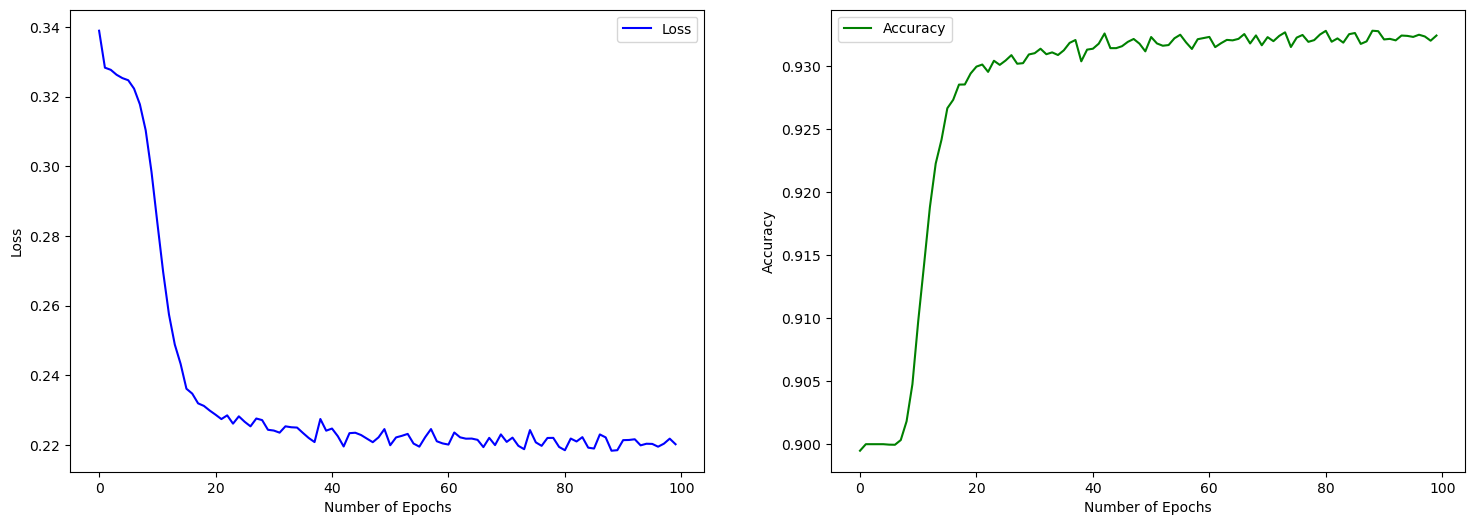

In [72]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="blue", label="Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color="green", label="Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()

plt.show()
